In [ ]:
# Load libraries
import requests
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from bs4 import BeautifulSoup
import pandas as pd

# Create values Selenium
USERNAME = #raw_input("Enter username: ") 
PASSWORD = #raw_input("Enter password: ") 
linkedin = 'https://www.linkedin.com'

# Open Selenium
browser = webdriver.Firefox()
browser.get(linkedin)
time.sleep(3)
# Identify email and password inputs and enter in information
email = browser.find_element_by_name('session_key')
password = browser.find_element_by_name('session_password')
email.send_keys(USERNAME + Keys.RETURN)
password.send_keys(PASSWORD + Keys.RETURN)
# Go to profile page and scroll to the bottom of the page to load elements of the page
time.sleep(3)

# Large Loop

In [ ]:
#Read csv
import csv
#from urllib import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import time

r = pd.read_csv("output_search.csv")

# Function to identify driver
def driving(x):
    if x.lower().find('data') != -1 or x.lower().find('scien') != -1 or x.lower().find('Data') != -1 or x.lower().find('Scien') != -1 or x.lower().find('machine') != -1:
        return(1)
    else:
        return(0)

    
# Create driver column
r['driver'] = list(map(driving, r['title']))

In [ ]:
#Remove value 0

r = r[r.driver != 0]
r

In [ ]:
#create empty data frame
Exp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
Edu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
Ski_df = pd.DataFrame(columns = ['profile', 'skill'])

#Create big loop
#for link in r.loc[0:5,'profile']:
for link in r.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(2)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(2)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
#Experience Section  
    titles = page.find_all('div', class_ = "pv-entity__position-group-pager")
    companies = page.find_all('span', class_ = "pv-entity__secondary-title")
    dates = page.find_all('h4', class_ = "pv-entity__date-range")

    #Put scraped data into exp_df

    arraylen1 = len(page.find_all('div', class_ = "pv-entity__position-group-pager"))

    profile = link
    exp_titles = list(map(lambda x: x.h3.text.strip(), titles))[0:arraylen1]
    exp_companies = list(map(lambda x: x.text.strip(), companies))[0:arraylen1]
    exp_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen1]
    
 #Education Section 
    institution = page.find_all('div', class_ = "pv-entity__degree-info")
    degree = page.find_all('p', class_ = "pv-entity__degree-name")
    dates = page.find_all('p', class_ = "pv-entity__dates")
 
    #Put scraped data into edu_df
    
    arraylen2 = len(page.find_all('div', class_ = "pv-entity__degree-info"))

    profile = link
    ed_name = list(map(lambda x: x.text.strip().split('\n')[-1], institution))[0:arraylen2]
    ed_deg = list(map(lambda x: x.text.strip().split('\n')[-1], degree))[0:arraylen2]
    ed_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen2]
    if len(ed_dates) < arraylen2:
        ed_dates = 'NA'
 #Skill Section 
    skill = page.find_all('span', class_ = "pv-skill-category-entity__name-text")
    
    #Put scraped data into a ski_df
    
    arraylen3 = len(page.find_all('span', class_ = "pv-skill-category-entity__name-text"))
        
    profile = link
    skill = list(map(lambda x: x.text.strip(), skill))[0:arraylen3]
    try:
        temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
        temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
        temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
        Exp_df = Exp_df.append(temp1)
        Edu_df = Edu_df.append(temp2)
        Ski_df = Ski_df.append(temp3)
        print(link, 'completed')
    except:
        print(link, 'skipped')
        continue

In [ ]:
Exp_df

In [ ]:
Edu_df

In [ ]:
Ski_df

In [ ]:
# Reset dataframe index
Exp_df.reset_index()
Edu_df.reset_index()
Ski_df.reset_index()
        
# Export results
Exp_df.to_csv("output_experience.csv", index = False,sep='\t', encoding='utf-8')
Edu_df.to_csv("output_education.csv", index = False,sep='\t', encoding='utf-8')
Ski_df.to_csv("output_skills.csv", index = False,sep='\t', encoding='utf-8')

In [ ]:
# Close Selenium
browser.quit()

# Data Visualizations 

In [1]:
# Load library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
experience = pd.read_csv("output_experience.csv", sep = '\t')
education = pd.read_csv("output_education.csv", sep = '\t')
skills = pd.read_csv("output_skills.csv", sep = '\t')

In [ ]:
experience

In [ ]:
education

In [ ]:
skills

In [3]:
#Combining skills, experience, education tables for analysis later

from functools import reduce

frames = [skills, experience, education]
Employees = reduce(lambda  left,right: pd.merge(left,right,on=['profile'],
                                            how='outer'), frames)
Employees

,profile,skill,exp_company,exp_dates,exp_title,ed_dates,ed_deg,ed_name
0,https://www.linkedin.com/in/tyzhangucb/,R,Uber,Jul 2017 – Present,Data Scientist II,2015 – 2016,Master of Arts (M.A.),4.00/4.00
1,https://www.linkedin.com/in/tyzhangucb/,R,Uber,Jul 2017 – Present,Data Scientist II,2012 – 2015,Bachelor of Science (BS),3.993/4.00
2,https://www.linkedin.com/in/tyzhangucb/,R,LeanTaaS,Jun 2016 – Jul 2017,Data Scientist,2015 – 2016,Master of Arts (M.A.),4.00/4.00
3,https://www.linkedin.com/in/tyzhangucb/,R,LeanTaaS,Jun 2016 – Jul 2017,Data Scientist,2012 – 2015,Bachelor of Science (BS),3.993/4.00
4,https://www.linkedin.com/in/tyzhangucb/,R,Tencent,Jun 2015 – Aug 2015,Strategy Intern,2015 – 2016,Master of Arts (M.A.),4.00/4.00
5,https://www.linkedin.com/in/tyzhangucb/,R,Tencent,Jun 2015 – Aug 2015,Strategy Intern,2012 – 2015,Bachelor of Science (BS),3.993/4.00
6,https://www.linkedin.com/in/tyzhangucb/,R,Alibaba Group,May 2014 – Jul 2014,Data Science Intern,2015 – 2016,Master of Arts (M.A.),4.00/4.00
7,https://www.linkedin.com/in/tyzhangucb/,R,Alibaba Group,May 2014 – Jul 2014,Data Science Intern,2012 – 2015,Bachelor of Science (BS),3.993/4.00
8,https://www.linkedin.com/in/tyzhangucb/,Python,Uber,Jul 2017 – Present,Data Scientist II,2015 – 2016,Master of Arts (M.A.),4.00/4.00
9,https://www.linkedin.com/in/tyzhangucb/,Python,Uber,Jul 2017 – Present,Data Scientist II,2012 – 2015,Bachelor of Science (BS),3.993/4.00


In [ ]:
#skills.merge(experience, left_on='profile', right_on='profile')


## Education Analysis

In [4]:
#Creating column to identify degree earned 

edu = education

# Function to identify degree
def degree(x):
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1 or x.lower().find('m.s') != -1 or x.lower().find('mba') != -1:
        return(1)
    if x.lower().find('phd') != -1 or x.lower().find('p.hd') != -1 or x.lower().find('ph.d.') != -1 or x.lower().find('ph.d') != -1:
        return(2)
    if x.lower().find('bachelor') != -1 or x.lower().find('ba') != -1 or x.lower().find('bs') != -1 or x.lower().find('b.a') != -1 or x.lower().find('b.s') != -1:
        return(3)
    else:
        return(0)

    
# Create degree column
edu['deg'] = list(map(degree, edu['ed_deg']))

edu

,ed_dates,ed_deg,ed_name,profile,deg
0,2015 – 2016,Master of Arts (M.A.),4.00/4.00,https://www.linkedin.com/in/tyzhangucb/,1
1,2012 – 2015,Bachelor of Science (BS),3.993/4.00,https://www.linkedin.com/in/tyzhangucb/,3
2,2003 – 2007,MS,Software Engineering,https://www.linkedin.com/in/skanajan/,1
3,2010 – 2016,Master of Business Administration (MBA),"Finance, General",https://www.linkedin.com/in/skanajan/,1
4,2000 – 2002,MSEE,Electrical Engineering,https://www.linkedin.com/in/skanajan/,1
5,2011 – 2015,Doctor of Philosophy (Ph.D.),Statistics,https://www.linkedin.com/in/fabriziolecci/,2
6,2011 – 2012,Master of Science (MS),Statistics,https://www.linkedin.com/in/fabriziolecci/,1
7,2009 – 2011,Master's Degree,Applied Mathematics,https://www.linkedin.com/in/fabriziolecci/,1
8,2012 – 2017,Doctor of Philosophy (Ph.D.),Ocean Modelling,https://www.linkedin.com/in/shitaowang/,2
9,2016 – 2016,Nanodegree,Machine Learning Engineer,https://www.linkedin.com/in/shitaowang/,0


### Last Degree Earned 

In [5]:
#Gathering only the employee's last completed education before employment 

eduF = edu.groupby('profile').first()
eduF

,ed_dates,ed_deg,ed_name,deg
profile,,,,
https://www.linkedin.com/in/9196377701/,2016 – 2017,"Master of Engineering (M.Eng.), Admissions Int...",Computer Science,1
https://www.linkedin.com/in/akshaytiwari19/,2017 – 2018,Master of Science - Data Science,Master of Science - Data Science,1
https://www.linkedin.com/in/amersinha/,2014 – 2015,Master’s Degree,3.74,1
https://www.linkedin.com/in/arunash/,2010 – 2013,MBA,"Marketing, Brand Management in High Tech; Cons...",1
https://www.linkedin.com/in/ashrita-johnson-jerald-045a826a/,2016 – 2018,Master’s Degree,Predictive Analytics,1
https://www.linkedin.com/in/aysent/,2009 – 2016,Doctor of Philosophy (Ph.D.),Physics,2
https://www.linkedin.com/in/e-ferhat-muhtar-3619652/,NaN,BA (top engineering school in Turkey),Industrial Engineering (2004),3
https://www.linkedin.com/in/eric-janofsky-9500638a/,2010 – 2015,Doctor of Philosophy (Ph.D.),Statistics,2
https://www.linkedin.com/in/eric-pinkham/,2012 – 2017,Doctor of Philosophy (PhD),Mathematics,2


In [6]:
#Looking into the percentages of each last degree earned 

eduF['deg'].value_counts(normalize=True) * 100

1    56.521739
2    28.260870
3    10.869565
0     4.347826
Name: deg, dtype: float64

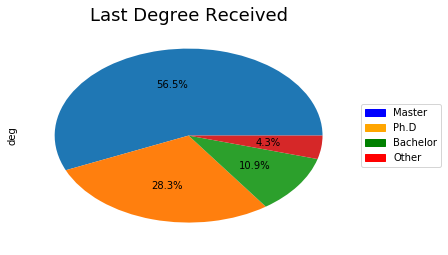

In [7]:
pie = eduF['deg'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie.set_title("Last Degree Received", fontsize=18)
Master = mpatches.Patch(color='blue', label='Master')
PhD = mpatches.Patch(color='orange', label='Ph.D')
Bachelor = mpatches.Patch(color='green', label='Bachelor')
Other = mpatches.Patch(color='red', label='Other')
plt.legend(handles=[Master,PhD,Bachelor,Other], loc='center left', bbox_to_anchor=(1, 0.5))

In [229]:
#Remove degrees Not bachelor 

edum = edu
edum = edum[edum.deg != 0]
edum = edum[edum.deg != 2]
edum = edum[edum.deg != 3]
edum

,ed_dates,ed_deg,ed_name,profile,deg
0,2015 – 2016,Master of Arts (M.A.),4.00/4.00,https://www.linkedin.com/in/tyzhangucb/,1
2,2003 – 2007,MS,Software Engineering,https://www.linkedin.com/in/skanajan/,1
3,2010 – 2016,Master of Business Administration (MBA),"Finance, General",https://www.linkedin.com/in/skanajan/,1
4,2000 – 2002,MSEE,Electrical Engineering,https://www.linkedin.com/in/skanajan/,1
6,2011 – 2012,Master of Science (MS),Statistics,https://www.linkedin.com/in/fabriziolecci/,1
7,2009 – 2011,Master's Degree,Applied Mathematics,https://www.linkedin.com/in/fabriziolecci/,1
12,2003 – 2005,Master of Science (M.Sc.),Civil Engineering,https://www.linkedin.com/in/skashuk/,1
13,NaN,Master of Science (MS),Survey Methodology,https://www.linkedin.com/in/yichenco2/,1
14,NaN,Master of Science - MS,Computer Science,https://www.linkedin.com/in/yichenco2/,1
17,2010 – 2012,Master of Arts (MA),Mathematics,https://www.linkedin.com/in/eric-pinkham/,1


In [231]:
# what master degree types are in the value?
edum['ed_name'].unique()

array(['4.00/4.00', 'Software Engineering', 'Finance, General',
       'Electrical Engineering', 'Statistics', 'Applied Mathematics',
       'Civil Engineering', 'Survey Methodology', 'Computer Science',
       'Mathematics', 'Physics', 'Predictive Analytics',
       'Finance & Marketing Management', '3.89', 'physics',
       'Industrial Engineering',
       'Econometrics and Quantitative Economics', 'Data Science',
       'Engineering Management', 'Mathematics of Finance',
       'Master of Science - Data Science',
       'Statistics - Advanced Methods and Data Analysis',
       'Applied Math and Physics', 'EE', 'Thermal engineering',
       'Operations Research and systems engineering',
       'Mechanical Engineering', '3.74', '3.9/4', 'Marketing Analytics',
       '3.73 GPA', 'Civil and Environmental Engineering',
       'Financial Engeering', 'Master of Business Administration - MBA',
       'Marketing, Brand Management in High Tech; Consumer Behavior',
       'Electrical and Compu

In [238]:
# Function to identify Master degree name

def degN(x):
    if x.lower().find('computer') != -1 or x.lower().find('science') != -1:
        return(1)
    if x.lower().find('stat') != -1 or x.lower().find('math') != -1 or x.lower().find('phy') != -1:
        return(2)
    if x.lower().find('engin') != -1 or x.lower().find('elect') != -1 or x.lower().find('ee') != -1:
        return(3)
    if x.lower().find('finan') != -1 or x.lower().find('econom') != -1:
        return(4)
    if x.lower().find('market') != -1 or x.lower().find('business') != -1:
        return(5)
    if x.lower().find('survey') != -1:
        return(6)
    else:
        return(0)

    
# Create degree column
edum['deg_name'] = list(map(degN, edum['ed_name']))

#Took out values = 0 because they are only gpa scores 
edum = edum[edum.deg_name != 0]

edum

,ed_dates,ed_deg,ed_name,profile,deg,deg_name
2,2003 – 2007,MS,Software Engineering,https://www.linkedin.com/in/skanajan/,1,3
3,2010 – 2016,Master of Business Administration (MBA),"Finance, General",https://www.linkedin.com/in/skanajan/,1,4
4,2000 – 2002,MSEE,Electrical Engineering,https://www.linkedin.com/in/skanajan/,1,3
6,2011 – 2012,Master of Science (MS),Statistics,https://www.linkedin.com/in/fabriziolecci/,1,2
7,2009 – 2011,Master's Degree,Applied Mathematics,https://www.linkedin.com/in/fabriziolecci/,1,2
12,2003 – 2005,Master of Science (M.Sc.),Civil Engineering,https://www.linkedin.com/in/skashuk/,1,3
13,NaN,Master of Science (MS),Survey Methodology,https://www.linkedin.com/in/yichenco2/,1,6
14,NaN,Master of Science - MS,Computer Science,https://www.linkedin.com/in/yichenco2/,1,1
17,2010 – 2012,Master of Arts (MA),Mathematics,https://www.linkedin.com/in/eric-pinkham/,1,2
21,2011 – 2013,Master of Science (MS),Physics,https://www.linkedin.com/in/szemedkun/,1,2


In [239]:
edum['deg_name'].value_counts(normalize=True) * 100

3    31.428571
2    28.571429
1    20.000000
5     8.571429
4     8.571429
6     2.857143
Name: deg_name, dtype: float64

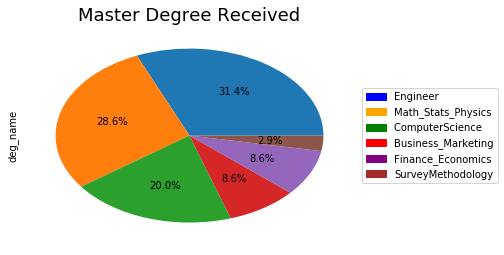

In [240]:
pie7 = edum['deg_name'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie7.set_title("Master Degree Received", fontsize=18)

Engineer = mpatches.Patch(color='blue', label='Engineer')
Math_Stats_Physics = mpatches.Patch(color='orange', label='Math_Stats_Physics')
ComputerScience  = mpatches.Patch(color='green', label='ComputerScience ')
Business_Marketing = mpatches.Patch(color='red', label='Business_Marketing')
Finance_Economics = mpatches.Patch(color='purple', label='Finance_Economics')
SurveyMethodology = mpatches.Patch(color = 'brown', label='SurveyMethodology')

plt.legend(handles=[Engineer,Math_Stats_Physics,ComputerScience,Business_Marketing,Finance_Economics,SurveyMethodology], loc='center left', bbox_to_anchor=(1, 0.5))

### Type of Bachelor Degree Earned

In [8]:
#Remove degrees NOT bachelor 

edub = edu
edub = edub[edub.deg != 0]
edub = edub[edub.deg != 1]
edub = edub[edub.deg != 2]
edub

,ed_dates,ed_deg,ed_name,profile,deg
1,2012 – 2015,Bachelor of Science (BS),3.993/4.00,https://www.linkedin.com/in/tyzhangucb/,3
10,2008 – 2012,Bachelor of Science (BS),Marine technology,https://www.linkedin.com/in/shitaowang/,3
15,NaN,Bachelor of Arts (BA),Communication (Marketing Research & Analytics),https://www.linkedin.com/in/yichenco2/,3
18,2005 – 2009,Bachelor of Arts (B.A.),Mathematics,https://www.linkedin.com/in/eric-pinkham/,3
20,2005 – 2009,BA,Economics and Mathematics,https://www.linkedin.com/in/eric-janofsky-9500...,3
22,2007 – 2011,BA,"Mathematics, Physics",https://www.linkedin.com/in/szemedkun/,3
28,2007 – 2011,Bachelor of Technology (B.Tech.),"Electrical, Electronics and Communications Eng...",https://www.linkedin.com/in/koyel-banerjee-196...,3
32,NaN,BS,physics,https://www.linkedin.com/in/yihualiao/,3
39,2007 – 2011,Bachelor of Engineering (B.E.),Electronics and Communication,https://www.linkedin.com/in/rahulrr/,3
41,NaN,Bachelor of Science,Engineering Mechanics,https://www.linkedin.com/in/yizhou-jerry-shen-...,3


In [9]:
# Function to identify Bachelor degree name

def degreeN(x):
    if x.lower().find('computer') != -1 or x.lower().find('science') != -1:
        return(1)
    if x.lower().find('stat') != -1 or x.lower().find('math') != -1 or x.lower().find('phy') != -1:
        return(2)
    if x.lower().find('eng') != -1 or x.lower().find('elect') != -1 or x.lower().find('ee') != -1:
        return(3)
    if x.lower().find('commun') != -1 or x.lower().find('art') != -1 or x.lower().find('econom') != -1:
        return(4)
    if x.lower().find('auto') != -1:
        return(5)
    if x.lower().find('mari') != -1:
        return(6)
    else:
        return(0)

    
# Create degree column
edub['deg_name'] = list(map(degreeN, edub['ed_name']))

#Took out values = 0 because they are only gpa scores 
edub = edub[edub.deg_name != 0]

edub

,ed_dates,ed_deg,ed_name,profile,deg,deg_name
10,2008 – 2012,Bachelor of Science (BS),Marine technology,https://www.linkedin.com/in/shitaowang/,3,6
15,NaN,Bachelor of Arts (BA),Communication (Marketing Research & Analytics),https://www.linkedin.com/in/yichenco2/,3,4
18,2005 – 2009,Bachelor of Arts (B.A.),Mathematics,https://www.linkedin.com/in/eric-pinkham/,3,2
20,2005 – 2009,BA,Economics and Mathematics,https://www.linkedin.com/in/eric-janofsky-9500...,3,2
22,2007 – 2011,BA,"Mathematics, Physics",https://www.linkedin.com/in/szemedkun/,3,2
28,2007 – 2011,Bachelor of Technology (B.Tech.),"Electrical, Electronics and Communications Eng...",https://www.linkedin.com/in/koyel-banerjee-196...,3,3
32,NaN,BS,physics,https://www.linkedin.com/in/yihualiao/,3,2
39,2007 – 2011,Bachelor of Engineering (B.E.),Electronics and Communication,https://www.linkedin.com/in/rahulrr/,3,3
41,NaN,Bachelor of Science,Engineering Mechanics,https://www.linkedin.com/in/yizhou-jerry-shen-...,3,3
47,2012 – 2015,Bachelor of Science (Honors),Computer Science,https://www.linkedin.com/in/akshaytiwari19/,3,1


In [10]:
edub['deg_name'].value_counts(normalize=True) * 100

2    36.363636
3    30.303030
1    18.181818
4     9.090909
6     3.030303
5     3.030303
Name: deg_name, dtype: float64

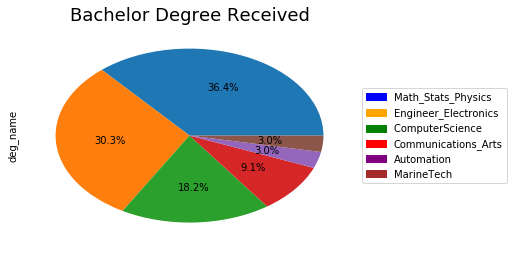

In [11]:
pie2 = edub['deg_name'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie2.set_title("Bachelor Degree Received", fontsize=18)

Math_Stats_Physics = mpatches.Patch(color='blue', label='Math_Stats_Physics')
Engineer_Electronics = mpatches.Patch(color='orange', label='Engineer_Electronics')
ComputerScience  = mpatches.Patch(color='green', label='ComputerScience ')
Communications_Arts = mpatches.Patch(color='red', label='Communications_Arts')
Automation = mpatches.Patch(color='purple', label='Automation')
MarineTech = mpatches.Patch(color = 'brown', label='MarineTech')

plt.legend(handles=[Math_Stats_Physics,Engineer_Electronics,ComputerScience,Communications_Arts,Automation,MarineTech], loc='center left', bbox_to_anchor=(1, 0.5))

/anaconda2/envs/py36/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


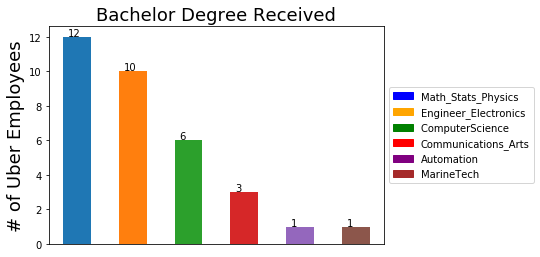

In [12]:
bar = edub['deg_name'].value_counts().plot(kind="bar", legend=True)
bar.set_title("Bachelor Degree Received", fontsize=18)
bar.set_xlabel("Bachelor Type", fontsize=18);
bar.set_ylabel("# of Uber Employees", fontsize=18);
labels = [item.get_text() for item in bar.get_xticklabels()]
labels[0] = 'Math_Stats_Physics'
labels[1] = 'Engineer_Electronics'
labels[2] = 'ComputerScience'
labels[3] = 'Communications_Arts'
labels[4] = 'Automation'
labels[5] = 'MarineTech'

#bar.set_xticklabels(labels)
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

Math_Stats_Physics = mpatches.Patch(color='blue', label='Math_Stats_Physics')
Engineer_Electronics = mpatches.Patch(color='orange', label='Engineer_Electronics')
ComputerScience  = mpatches.Patch(color='green', label='ComputerScience ')
Communications_Arts = mpatches.Patch(color='red', label='Communications_Arts')
Automation = mpatches.Patch(color='purple', label='Automation')
MarineTech = mpatches.Patch(color = 'brown', label='MarineTech')

plt.legend(handles=[Math_Stats_Physics,Engineer_Electronics,ComputerScience,Communications_Arts,Automation,MarineTech], loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    bar.annotate(format(height), (p.get_x()+.18*width, p.get_y() + height + 0.05))
    

## Skill Analysis


In [ ]:
#Creating column to identify type of skill

#ski = skills

# Function to identify skill
#def skill(x):
 #   if x.lower().find('data') != -1 or x.lower().find('analy') != -1 or x.lower().find('research') != -1 or x.lower().find('hadoop') != -1 or x.lower().find('hive') != -1 or x.lower().find('strategy') != -1 or x.lower().find('algor') != -1:
  #      return(1)
   # if x.lower().find('machine') != -1 or x.lower().find('learning') != -1 or x.lower().find('stat') != -1 or x.lower().find('model') != -1 or x.lower().find('matlab') != -1 or x.lower().find('image') != -1 or x.lower().find('quantit') != -1:
    #    return(2)
    #if x.lower().find('software') != -1 or x.lower().find('product') != -1 or x.lower().find('glob') != -1 or x.lower().find('asset') != -1 or x.lower().find('mob') != -1 or x.lower().find('science') != -1:
     #   return(3)
   # if x.lower().find('python') != -1 or x.lower().find('r') != -1 or x.lower().find('sql') != -1 or x.lower().find('c++') != -1 or x.lower().find('java') != -1 or x.lower().find('linux') != -1 or x.lower().find('c') != -1:
    #    return(4)
   # else:
    #    return(0)

    
# Create skill type column
#ski['ski_type'] = list(map(skill, ski['skill']))
#ski


In [ ]:
#Create column to identify coding language from other skills 

#ski = skills

#Function to identify skill 
#def skill(x):
#    if x.lower().find('python') != -1 or x.lower().find('r') != -1 or x.lower().find('sql') != -1 or x.lower().find('c++') != -1 or x.lower().find('java') != -1 or x.lower().find('linux') != -1 or x.lower().find('c') != -1:
 #       return(1) 
#    else:
#        return(0)

# Create skill type column
#ski['ski_type'] = list(map(skill, ski['skill']))
#ski


###get list and use filter (10)
###use bar graph how many mentions of each y axis # of mentions 

### Best coding language to know

In [13]:
# what skills are in the value?
ski = skills
ski['skill'].unique()

array(['R', 'Python', 'SQL', 'Machine Learning', 'Software Development',
       'Statistical Modeling', 'Data Science', 'Data Analysis', 'C++',
       'Mathematical Modeling', 'Optimization Models',
       'Quantitative Analytics', 'Research', 'Statistics', 'Data Mining',
       'Exploratory Data Analysis', 'Java',
       '{pandas, sklearn, numpy/scipy, pyspark, seaborn, NLTK, keras}',
       'Matlab', 'Image Processing', 'C', 'Analytics',
       'Design of Experiments', 'Deep Learning', 'Microsoft Excel',
       'Strategy', 'Experimental Design', 'Algorithms', 'Hadoop',
       'Big Data', 'Hive', 'Programming', 'Combinatorial Optimization',
       'Start-ups', 'Entrepreneurship', 'Business Intelligence',
       'Business Analytics', 'Web Analytics', 'Computer Vision',
       'Time Series Analysis', 'Data Warehousing', 'Microsoft SQL Server',
       'Linux', 'Databases', 'Product Management', 'Quantitative Finance',
       'Global Macro', 'Asset Allocation', 'Mobile Devices',
       'C

In [14]:
ski2 = ski.loc[ski['skill'].isin(['R','Python', 'SQL', 'C++', 'Java', 'C'])]
ski2
ski2['skill'].value_counts(normalize=True) * 100

Python    46.428571
C++       14.285714
R         14.285714
Java      10.714286
C         10.714286
SQL        3.571429
Name: skill, dtype: float64

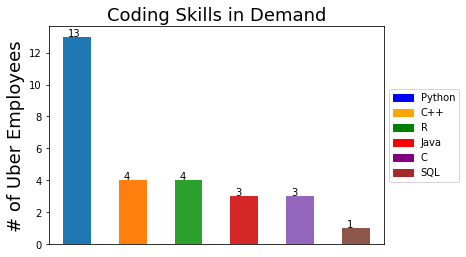

In [15]:
skilbar = ski2['skill'].value_counts().plot(kind="bar", legend=True)
skilbar.set_title("Coding Skills in Demand", fontsize=18)
skilbar.set_xlabel("Skill", fontsize=18);
skilbar.set_ylabel("# of Uber Employees", fontsize=18);
labels = [item.get_text() for item in bar.get_xticklabels()]
labels[0] = 'Python'
labels[1] = 'C++'
labels[2] = 'R'
labels[3] = 'Java'
labels[4] = 'C'
labels[5] = 'SQL'

axx = plt.axes()
x_axis2 = axx.axes.get_xaxis()
x_axis2.set_visible(False)

Python = mpatches.Patch(color='blue', label='Python')
Cplus = mpatches.Patch(color='orange', label='C++')
R = mpatches.Patch(color='green', label='R')
Java = mpatches.Patch(color='red', label='Java')
C = mpatches.Patch(color='purple', label='C')
SQL = mpatches.Patch(color = 'brown', label='SQL')

plt.legend(handles=[Python,Cplus,R,Java,C,SQL], loc='center left', bbox_to_anchor=(1, 0.5))

for g in axx.patches:
    width, height = g.get_width(), g.get_height()
    x, y = g.get_xy() 
    skilbar.annotate(format(height), (g.get_x()+.18*width, g.get_y() + height + 0.05))

## Experience Analysis

In [16]:
exp = experience

# Function to identify company uber
def uber(x):
    if x.lower().find('uber') != -1:
        return(1)
    else:
        return(0)

    
# Create uber column
exp['uber'] = list(map(uber, exp['exp_company']))

#Remove value 0
#expU = expU[expU.uber != 0]

exp

,exp_company,exp_dates,exp_title,profile,uber
0,Uber,Jul 2017 – Present,Data Scientist II,https://www.linkedin.com/in/tyzhangucb/,1
1,LeanTaaS,Jun 2016 – Jul 2017,Data Scientist,https://www.linkedin.com/in/tyzhangucb/,0
2,Tencent,Jun 2015 – Aug 2015,Strategy Intern,https://www.linkedin.com/in/tyzhangucb/,0
3,Alibaba Group,May 2014 – Jul 2014,Data Science Intern,https://www.linkedin.com/in/tyzhangucb/,0
4,Uber,Jul 2017 – Present,Senior Data Scientist,https://www.linkedin.com/in/skanajan/,1
5,General Assembly,Jul 2015 – Present,Data Science Instructor,https://www.linkedin.com/in/skanajan/,0
6,Goldman Sachs,Feb 2016 – Jul 2017,Senior Data Scientist / Vice President,https://www.linkedin.com/in/skanajan/,0
7,6sense,Sep 2015 – Feb 2016,Senior Data Scientist,https://www.linkedin.com/in/skanajan/,0
8,Change.org,Nov 2014 – Aug 2015,Data Science Engineering Manager,https://www.linkedin.com/in/skanajan/,0
9,Uber,Jan 2017 – Present,Data Scientist,https://www.linkedin.com/in/fabriziolecci/,1


### Companies Employees worked at before Uber 

In [17]:
#Creating table to show all companies but Uber

exp = experience

#Remove value 1
expC = exp[exp.uber != 1]
expC

,exp_company,exp_dates,exp_title,profile,uber
1,LeanTaaS,Jun 2016 – Jul 2017,Data Scientist,https://www.linkedin.com/in/tyzhangucb/,0
2,Tencent,Jun 2015 – Aug 2015,Strategy Intern,https://www.linkedin.com/in/tyzhangucb/,0
3,Alibaba Group,May 2014 – Jul 2014,Data Science Intern,https://www.linkedin.com/in/tyzhangucb/,0
5,General Assembly,Jul 2015 – Present,Data Science Instructor,https://www.linkedin.com/in/skanajan/,0
6,Goldman Sachs,Feb 2016 – Jul 2017,Senior Data Scientist / Vice President,https://www.linkedin.com/in/skanajan/,0
7,6sense,Sep 2015 – Feb 2016,Senior Data Scientist,https://www.linkedin.com/in/skanajan/,0
8,Change.org,Nov 2014 – Aug 2015,Data Science Engineering Manager,https://www.linkedin.com/in/skanajan/,0
10,Duke University - The Fuqua School of Business,2016 – Present,Adjunct Professor,https://www.linkedin.com/in/fabriziolecci/,0
11,New York Life Insurance Company,2015 – 2017,Data Scientist,https://www.linkedin.com/in/fabriziolecci/,0
12,Carnegie Mellon University,2011 – 2015,PhD in Statistics,https://www.linkedin.com/in/fabriziolecci/,0


In [18]:
#Gathering only the employee's last employment before starting at Uber

expCL = expC.groupby('profile').first()
expCL

,exp_company,exp_dates,exp_title,uber
profile,,,,
https://www.linkedin.com/in/9196377701/,Club Factory,Apr 2016 – Jun 2016,Software Engineer Internship,0
https://www.linkedin.com/in/akshaytiwari19/,University of San Francisco,Aug 2018 – Present,Teaching Assistant,0
https://www.linkedin.com/in/amersinha/,Rocket Fuel Inc.,Apr 2016 – Dec 2017,"Rocket Scientist, Machine Learning Engineer",0
https://www.linkedin.com/in/arunash/,Ampush,Dec 2017 – Present,"Senior Director, Products",0
https://www.linkedin.com/in/ashrita-johnson-jerald-045a826a/,DePaul University Career Center,Sep 2016 – Present,Student Employee,0
https://www.linkedin.com/in/aysent/,The Honest Company,Nov 2016 – Mar 2018,Data Scientist,0
https://www.linkedin.com/in/e-ferhat-muhtar-3619652/,Walmart Global eCommerce,Jan 2015 – Jan 2017,Senior Director of Product Analytics,0
https://www.linkedin.com/in/eric-janofsky-9500638a/,x.ai,Jun 2016 – Dec 2017,Senior Data Scientist,0
https://www.linkedin.com/in/eric-pinkham/,Insight Data Science,Apr 2018 – Aug 2018,Data Engineering Fellow,0


In [19]:
##Not useful due to numbers

#Looking at top 10 companies employees worked before Uber 

expCL['exp_company'].value_counts(normalize=False).nlargest(10) 

Postmates             2
Citadel LLC           2
Rocket Fuel Inc.      1
The Honest Company    1
Capital One           1
KeyMe                 1
Walmart Labs          1
Vistaprint            1
Factual Inc           1
Microsoft             1
Name: exp_company, dtype: int64

([<matplotlib.axis.YTick at 0x1a22eb0050>,
 <a list of 10 Text yticklabel objects>)

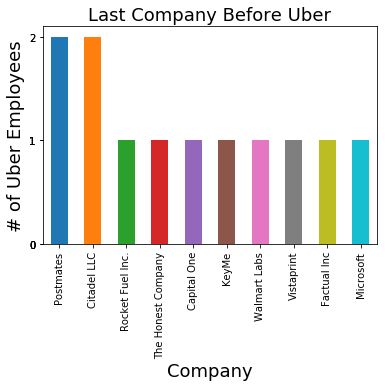

In [118]:
bar2 = expCL['exp_company'].value_counts().nlargest(10).plot(kind="bar")
bar2.set_title("Last Company Before Uber", fontsize=18)
bar2.set_xlabel("Company", fontsize=18);
bar2.set_ylabel("# of Uber Employees", fontsize=18);

# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

### Years of experience before Uber


In [21]:
# how many years of experience before Uber

#drop duplicates in dataframe and only keep: profile,exp_company,exp_dates,ed_dates,ed_degree
less = Employees.iloc[:,[0, 6, 5, 2, 3]].drop_duplicates(keep = 'first')

#keep only information for uber
degexp = less.loc[less['exp_company'] == 'Uber']

#drop nan values 
degexpE = degexp.dropna(how='any')
degexpE

,profile,ed_deg,ed_dates,exp_company,exp_dates
0,https://www.linkedin.com/in/tyzhangucb/,Master of Arts (M.A.),2015 – 2016,Uber,Jul 2017 – Present
1,https://www.linkedin.com/in/tyzhangucb/,Bachelor of Science (BS),2012 – 2015,Uber,Jul 2017 – Present
24,https://www.linkedin.com/in/skanajan/,MS,2003 – 2007,Uber,Jul 2017 – Present
25,https://www.linkedin.com/in/skanajan/,Master of Business Administration (MBA),2010 – 2016,Uber,Jul 2017 – Present
26,https://www.linkedin.com/in/skanajan/,MSEE,2000 – 2002,Uber,Jul 2017 – Present
69,https://www.linkedin.com/in/fabriziolecci/,Doctor of Philosophy (Ph.D.),2011 – 2015,Uber,Jan 2017 – Present
70,https://www.linkedin.com/in/fabriziolecci/,Master of Science (MS),2011 – 2012,Uber,Jan 2017 – Present
71,https://www.linkedin.com/in/fabriziolecci/,Master's Degree,2009 – 2011,Uber,Jan 2017 – Present
114,https://www.linkedin.com/in/shitaowang/,Doctor of Philosophy (Ph.D.),2012 – 2017,Uber,Oct 2017 – Present
115,https://www.linkedin.com/in/shitaowang/,Nanodegree,2016 – 2016,Uber,Oct 2017 – Present


In [22]:
#only select last 4 string in value for the year 
degexpE.loc[:,'ed_dates'] = list(map(lambda x: None if x is None else str(x)[-4:], degexpE['ed_dates']))

#only select string inside whole value with the year
degexpE.loc[:,'exp_dates'] = list(map(lambda x: None if x is None else str(x)[4:9], degexpE['exp_dates']))

#Pull last education year
degexpE = degexpE.groupby('profile').first()
degexpE = degexpE.reset_index()
degexpE

/anaconda2/envs/py36/lib/python2.7/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,profile,ed_deg,ed_dates,exp_company,exp_dates
0,https://www.linkedin.com/in/9196377701/,"Master of Engineering (M.Eng.), Admissions Int...",2017,Uber,2017
1,https://www.linkedin.com/in/akshaytiwari19/,Master of Science - Data Science,2018,Uber,2018
2,https://www.linkedin.com/in/arunash/,MBA,2013,Uber,2019
3,https://www.linkedin.com/in/ashrita-johnson-je...,Master’s Degree,2018,Uber,2017
4,https://www.linkedin.com/in/aysent/,Doctor of Philosophy (Ph.D.),2016,Uber,2018
5,https://www.linkedin.com/in/eric-janofsky-9500...,Doctor of Philosophy (Ph.D.),2015,Uber,2018
6,https://www.linkedin.com/in/eric-pinkham/,Doctor of Philosophy (PhD),2017,Uber,2018
7,https://www.linkedin.com/in/fabriziolecci/,Doctor of Philosophy (Ph.D.),2015,Uber,2017
8,https://www.linkedin.com/in/hesenpeng/,PhD,2012,Uber,2017
9,https://www.linkedin.com/in/hongyanglei/,Master of Science,2016,Uber,2018


In [23]:
#drop row with value '-' in column exp_dates 
degexpE = degexpE.drop([14])
degexpE

,profile,ed_deg,ed_dates,exp_company,exp_dates
0,https://www.linkedin.com/in/9196377701/,"Master of Engineering (M.Eng.), Admissions Int...",2017,Uber,2017
1,https://www.linkedin.com/in/akshaytiwari19/,Master of Science - Data Science,2018,Uber,2018
2,https://www.linkedin.com/in/arunash/,MBA,2013,Uber,2019
3,https://www.linkedin.com/in/ashrita-johnson-je...,Master’s Degree,2018,Uber,2017
4,https://www.linkedin.com/in/aysent/,Doctor of Philosophy (Ph.D.),2016,Uber,2018
5,https://www.linkedin.com/in/eric-janofsky-9500...,Doctor of Philosophy (Ph.D.),2015,Uber,2018
6,https://www.linkedin.com/in/eric-pinkham/,Doctor of Philosophy (PhD),2017,Uber,2018
7,https://www.linkedin.com/in/fabriziolecci/,Doctor of Philosophy (Ph.D.),2015,Uber,2017
8,https://www.linkedin.com/in/hesenpeng/,PhD,2012,Uber,2017
9,https://www.linkedin.com/in/hongyanglei/,Master of Science,2016,Uber,2018


In [24]:
#change dtype from object to int.
degexpE['ed_dates'] = degexpE['ed_dates'].astype(str).astype(int)
degexpE['exp_dates'] = degexpE['exp_dates'].astype(str).astype(int)

# Create years_exp column with totals
degexpE['years_exp'] = degexpE['exp_dates'] - degexpE['ed_dates']
degexpE

,profile,ed_deg,ed_dates,exp_company,exp_dates,years_exp
0,https://www.linkedin.com/in/9196377701/,"Master of Engineering (M.Eng.), Admissions Int...",2017,Uber,2017,0
1,https://www.linkedin.com/in/akshaytiwari19/,Master of Science - Data Science,2018,Uber,2018,0
2,https://www.linkedin.com/in/arunash/,MBA,2013,Uber,2019,6
3,https://www.linkedin.com/in/ashrita-johnson-je...,Master’s Degree,2018,Uber,2017,-1
4,https://www.linkedin.com/in/aysent/,Doctor of Philosophy (Ph.D.),2016,Uber,2018,2
5,https://www.linkedin.com/in/eric-janofsky-9500...,Doctor of Philosophy (Ph.D.),2015,Uber,2018,3
6,https://www.linkedin.com/in/eric-pinkham/,Doctor of Philosophy (PhD),2017,Uber,2018,1
7,https://www.linkedin.com/in/fabriziolecci/,Doctor of Philosophy (Ph.D.),2015,Uber,2017,2
8,https://www.linkedin.com/in/hesenpeng/,PhD,2012,Uber,2017,5
9,https://www.linkedin.com/in/hongyanglei/,Master of Science,2016,Uber,2018,2


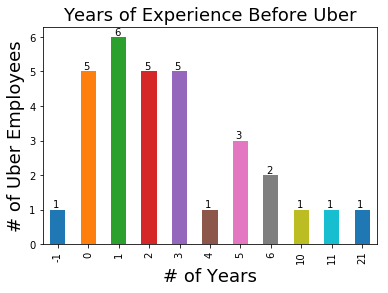

In [243]:
yearbar = degexpE['years_exp'].value_counts().sort_index(ascending=True).plot(kind="bar")
yearbar.set_title("Years of Experience Before Uber", fontsize=18)
yearbar.set_xlabel("# of Years", fontsize=18);
yearbar.set_ylabel("# of Uber Employees", fontsize=18);

axl = plt.axes()
x_axis2 = axl.axes.get_xaxis()
x_axis2.set_visible(True)

for s in axl.patches:
    width, height = s.get_width(), s.get_height()
    x, y = s.get_xy() 
    yearbar.annotate(format(height), (s.get_x()+.18*width, s.get_y() + height + 0.05))

### Employee's starting year at Uber

In [26]:
#drop duplicates in dataframe and only keep: profile,exp_company,exp_dates
less2 = Employees.iloc[:,[0, 2, 3]].drop_duplicates(keep = 'first')

#keep only information for uber
expY = less2.loc[less['exp_company'] == 'Uber']
expY

,profile,exp_company,exp_dates
0,https://www.linkedin.com/in/tyzhangucb/,Uber,Jul 2017 – Present
24,https://www.linkedin.com/in/skanajan/,Uber,Jul 2017 – Present
69,https://www.linkedin.com/in/fabriziolecci/,Uber,Jan 2017 – Present
114,https://www.linkedin.com/in/shitaowang/,Uber,Oct 2017 – Present
141,https://www.linkedin.com/in/skashuk/,Uber,Nov 2017 – Present
171,https://www.linkedin.com/in/yichenco2/,Uber,Feb 2018 – Present
207,https://www.linkedin.com/in/eric-pinkham/,Uber,Aug 2018 – Present
252,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,Jan 2018 – Present
276,https://www.linkedin.com/in/szemedkun/,Uber,Nov 2017 – Present
366,https://www.linkedin.com/in/yihualiao/,Uber,Nov 2017 – Present


In [27]:
#only get the year in exp_dates column
expY.loc[:,'exp_dates'] = list(map(lambda x: None if x is None else str(x)[4:9], expY['exp_dates']))
expY

,profile,exp_company,exp_dates
0,https://www.linkedin.com/in/tyzhangucb/,Uber,2017
24,https://www.linkedin.com/in/skanajan/,Uber,2017
69,https://www.linkedin.com/in/fabriziolecci/,Uber,2017
114,https://www.linkedin.com/in/shitaowang/,Uber,2017
141,https://www.linkedin.com/in/skashuk/,Uber,2017
171,https://www.linkedin.com/in/yichenco2/,Uber,2018
207,https://www.linkedin.com/in/eric-pinkham/,Uber,2018
252,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,2018
276,https://www.linkedin.com/in/szemedkun/,Uber,2017
366,https://www.linkedin.com/in/yihualiao/,Uber,2017


In [28]:
#drop row with value '-' in column exp_dates 
expY = expY.drop([891])
expY

,profile,exp_company,exp_dates
0,https://www.linkedin.com/in/tyzhangucb/,Uber,2017
24,https://www.linkedin.com/in/skanajan/,Uber,2017
69,https://www.linkedin.com/in/fabriziolecci/,Uber,2017
114,https://www.linkedin.com/in/shitaowang/,Uber,2017
141,https://www.linkedin.com/in/skashuk/,Uber,2017
171,https://www.linkedin.com/in/yichenco2/,Uber,2018
207,https://www.linkedin.com/in/eric-pinkham/,Uber,2018
252,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,2018
276,https://www.linkedin.com/in/szemedkun/,Uber,2017
366,https://www.linkedin.com/in/yihualiao/,Uber,2017


In [ ]:
#Creating table to show information only for Uber

#Remove value 0
#expU = exp[exp.uber != 0]
#expU

In [ ]:
#Creating column to categorize Uber starting year

# Function to identify starting year at Uber
#def uberY(x):
 #   if x.lower().find('2014') != -1:
  #      return(1)
#    if x.lower().find('2015') != -1:
 #        return(2)
#    if x.lower().find('2016') != -1:
#         return(3)
#    if x.lower().find('2017') != -1:
#         return(4)
#    if x.lower().find('2018') != -1:
#         return(5)
#    if x.lower().find('2019') != -1:
#         return(6)
#    else:
#        return(0)

    
# Create starting year column
#expU['uberY'] = list(map(uberY, expU['exp_dates']))
#expU

In [158]:
expY.dtypes

expY['exp_dates'] = expY['exp_dates'].astype('category')

In [29]:
expY['exp_dates'].value_counts(normalize=True) * 100

2017     44.186047
2018     39.534884
2015      9.302326
2019      2.325581
2014      2.325581
2016      2.325581
Name: exp_dates, dtype: float64

In [164]:
expY['exp_dates'].value_counts()

2017     19
2018     17
2015      4
2019      1
2016      1
2014      1
Name: exp_dates, dtype: int64

([<matplotlib.axis.YTick at 0x1a25d2a410>,
 <a list of 9 Text yticklabel objects>)

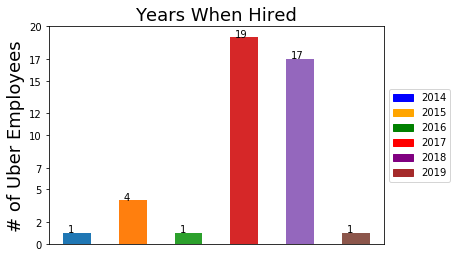

In [245]:
expYb = expY['exp_dates'].value_counts().sort_index(ascending=True).plot(kind="bar", legend=True)
expYb.set_title("Years When Hired", fontsize=18)
expYb.set_xlabel("Year", fontsize=18);
expYb.set_ylabel("# of Uber Employees", fontsize=18);

labelsY = [item.get_text() for item in bar.get_xticklabels()]
labelsY[0] = '2014'
labelsY[1] = '2015'
labelsY[2] = '2016'
labelsY[3] = '2017'
labelsY[3] = '2018'
labelsY[3] = '2019'


axy = plt.axes()
x_axisy = axy.axes.get_xaxis()
x_axisy.set_visible(False)

fourteen = mpatches.Patch(color='blue', label='2014')
fifteen = mpatches.Patch(color='orange', label='2015')
sixteen = mpatches.Patch(color='green', label='2016')
seventeen = mpatches.Patch(color='red', label='2017')
eighteen = mpatches.Patch(color='purple', label='2018')
nineteen = mpatches.Patch(color='brown', label='2019')

plt.legend(handles=[fourteen,fifteen,sixteen,seventeen,eighteen,nineteen], loc='center left', bbox_to_anchor=(1, 0.5))

for k in axy.patches:
    width, height = k.get_width(), k.get_height()
    x, y = k.get_xy() 
    expYb.annotate(format(height), (k.get_x()+.18*width, k.get_y() + height + 0.05))
    
# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

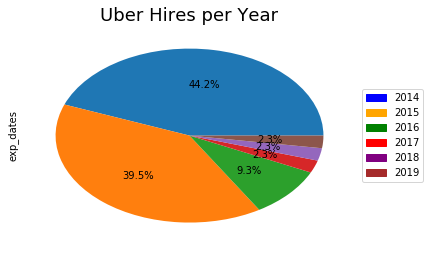

In [247]:
expYP = expY['exp_dates'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

expYP.set_title("Uber Hires per Year", fontsize=18)

fourteen = mpatches.Patch(color='blue', label='2014')
fifteen = mpatches.Patch(color='orange', label='2015')
sixteen = mpatches.Patch(color='green', label='2016')
seventeen = mpatches.Patch(color='red', label='2017')
eighteen = mpatches.Patch(color='purple', label='2018')
nineteen = mpatches.Patch(color='brown', label='2019')


plt.legend(handles=[fourteen,fifteen,sixteen,seventeen,eighteen,nineteen], loc='center left', bbox_to_anchor=(1, 0.5))


In [185]:
#expY2 = expY.exp_dates.value_counts().reset_index().rename(columns={'index': 'exp_dates', 0: 'count'})
expY2 = expY['exp_dates'].value_counts()\
                 .to_frame('count').rename_axis('exp_dates')\
                 .reset_index()
expY2

,exp_dates,count
0,2017,19
1,2018,17
2,2015,4
3,2019,1
4,2016,1
5,2014,1


In [ ]:
#import numpy as np 


#expY2['exp_dates'].hist() 
#plt.show()

#expY2.plot()

#expY2.plot(x = 'exp_dates', y = 'count', kind = 'line')

#expY2.rename(index=str, columns={"exp_dates": "exp_dates", "count": "count"}).plot()

#expY3= expY2.set_index('exp_dates')
#ax33 = df.plot(xticks=df.index)
#ax44 = expY3.plot(xticks=expY3.index)
#ax44.set_xticklabels(expY3["exp_dates"]);


#expY2.plot(x='exp_dates', y='count', xticks=['exp_dates'])



#expY.hist(column='exp_dates')

#table = expY['exp_dates'].value_counts().plot()
#table.set_title("Year Started at Uber", fontsize=18)
#table.set_xlabel("Year", fontsize=18);
#table.set_ylabel("# of Uber Employees", fontsize=18);

### Job titles at Uber for Data Scienitist field 

In [31]:
#Categorize job positions 

# Function to identify job titles at Uber
def uberJ(x):
    if x.lower().find('soft') != -1:
        return(1)
    if x.lower().find('machine') != -1:
         return(2)
    if x.lower().find('scien') != -1:
         return(3)
    if x.lower().find('analy') != -1:
         return(4)
    if x.lower().find('prod') != -1:
         return(5)
    if x.lower().find('resea') != -1 or x.lower().find('dat') != -1 or x.lower().find('auto') != -1:
         return(6)
    else:
        return(0)

#Remove value 0
expT = exp[exp.uber != 0]  

    
# Create starting year column
expT['uberJ'] = list(map(uberJ, expT['exp_title']))
expT

/anaconda2/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,exp_company,exp_dates,exp_title,profile,uber,uberJ
0,Uber,Jul 2017 – Present,Data Scientist II,https://www.linkedin.com/in/tyzhangucb/,1,3
4,Uber,Jul 2017 – Present,Senior Data Scientist,https://www.linkedin.com/in/skanajan/,1,3
9,Uber,Jan 2017 – Present,Data Scientist,https://www.linkedin.com/in/fabriziolecci/,1,3
14,Uber,Oct 2017 – Present,Data Scientist II,https://www.linkedin.com/in/shitaowang/,1,3
17,Uber,Nov 2017 – Present,Senior Data Scientist,https://www.linkedin.com/in/skashuk/,1,3
22,Uber,Feb 2018 – Present,"Data Scientist, Driver Product",https://www.linkedin.com/in/yichenco2/,1,3
26,Uber,Aug 2018 – Present,Software Engineer II,https://www.linkedin.com/in/eric-pinkham/,1,1
31,Uber,Jan 2018 – Present,Data Scientist,https://www.linkedin.com/in/eric-janofsky-9500...,1,3
35,Uber,Nov 2017 – Present,Software Engineer,https://www.linkedin.com/in/szemedkun/,1,1
40,Uber,Jun 2017 – Present,Data Analyst Intern,https://www.linkedin.com/in/ashrita-johnson-je...,1,4


In [32]:
# what titles are in the value?
expT['exp_title'].unique()

array(['Data Scientist II', 'Senior Data Scientist', 'Data Scientist',
       'Data Scientist, Driver Product', 'Software Engineer II',
       'Software Engineer', 'Data Analyst Intern', 'Autonomy engineer',
       'Risk Data Science', 'Data Analyst', 'Sr. Data Scientist',
       'Machine Learning Engineer',
       'Data Science Manager - Applied Machine Learning',
       'Senior Software Engineer - Data',
       'Senior Data Scientist II - Technical Lead Manager(TLM)',
       'Data Science Manager (Hiring!)',
       'Data and Insights, Risk management',
       'Head of Marketing Data Science and Analytics- HIRING',
       'Data Research', 'Data Analyst I, SEO & Web Analytics',
       'Lead Data Engineer', 'Senior Data Scientist - Policy & Legal',
       'Product Consultant', 'Product Management', 'Data Analyst II',
       'Data Scientist, Matching'], dtype=object)

In [33]:
expT['uberJ'].value_counts(normalize=True) * 100

3    60.869565
1    10.869565
6     8.695652
4     8.695652
2     6.521739
5     4.347826
Name: uberJ, dtype: float64

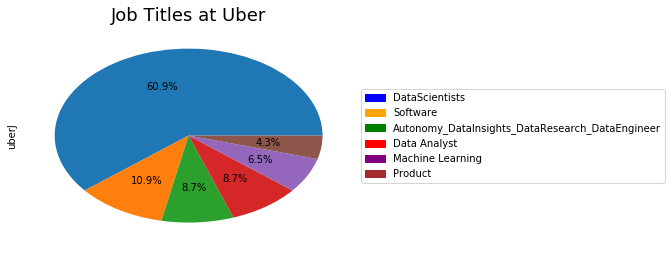

In [34]:
pie3 = expT['uberJ'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie3.set_title("Job Titles at Uber", fontsize=18)

DataScientists = mpatches.Patch(color='blue', label='DataScientists')
Software = mpatches.Patch(color='orange', label='Software')
Autonomy_DataInsights_DataResearch_DataEngineer  = mpatches.Patch(color='green', label='Autonomy_DataInsights_DataResearch_DataEngineer')
DataAnalyst = mpatches.Patch(color='red', label='Data Analyst')
MachineLearning = mpatches.Patch(color='purple', label='Machine Learning')
Product = mpatches.Patch(color = 'brown', label='Product')

plt.legend(handles=[DataScientists,Software,Autonomy_DataInsights_DataResearch_DataEngineer,DataAnalyst,MachineLearning,Product], loc='center left', bbox_to_anchor=(1, 0.5))


### Categorize Data Scientists titles

In [35]:
#Creating table to show information only for job title Data Scientists in category 
expDS = expT

#Remove values NOT Data Science 
expDS = expDS[expDS.uberJ != 0]
expDS = expDS[expDS.uberJ != 1]
expDS = expDS[expDS.uberJ != 2]
expDS = expDS[expDS.uberJ != 4]
expDS = expDS[expDS.uberJ != 5]
expDS = expDS[expDS.uberJ != 6]

#Drop columns not needed for analysis - uber
expDS = expDS.drop(['uber', 'uberJ'], axis = 1)
expDS

,exp_company,exp_dates,exp_title,profile
0,Uber,Jul 2017 – Present,Data Scientist II,https://www.linkedin.com/in/tyzhangucb/
4,Uber,Jul 2017 – Present,Senior Data Scientist,https://www.linkedin.com/in/skanajan/
9,Uber,Jan 2017 – Present,Data Scientist,https://www.linkedin.com/in/fabriziolecci/
14,Uber,Oct 2017 – Present,Data Scientist II,https://www.linkedin.com/in/shitaowang/
17,Uber,Nov 2017 – Present,Senior Data Scientist,https://www.linkedin.com/in/skashuk/
22,Uber,Feb 2018 – Present,"Data Scientist, Driver Product",https://www.linkedin.com/in/yichenco2/
31,Uber,Jan 2018 – Present,Data Scientist,https://www.linkedin.com/in/eric-janofsky-9500...
49,Uber,Nov 2017 – Present,Risk Data Science,https://www.linkedin.com/in/yihualiao/
54,Uber,Nov 2015 – Present,Data Scientist,https://www.linkedin.com/in/vivek-nayini-57691...
57,Uber,Mar 2018 – Present,Data Scientist II,https://www.linkedin.com/in/yunxiao-liu-7788555a/


In [36]:
# what data science titles are in the value?
expDS['exp_title'].unique()

array(['Data Scientist II', 'Senior Data Scientist', 'Data Scientist',
       'Data Scientist, Driver Product', 'Risk Data Science',
       'Sr. Data Scientist',
       'Senior Data Scientist II - Technical Lead Manager(TLM)',
       'Data Science Manager (Hiring!)',
       'Head of Marketing Data Science and Analytics- HIRING',
       'Senior Data Scientist - Policy & Legal',
       'Data Scientist, Matching'], dtype=object)

In [37]:
expDS['exp_title'].value_counts(normalize=True) * 100

Data Scientist                                            35.714286
Data Scientist II                                         17.857143
Senior Data Scientist                                     17.857143
Data Scientist, Driver Product                             3.571429
Senior Data Scientist - Policy & Legal                     3.571429
Head of Marketing Data Science and Analytics- HIRING       3.571429
Data Scientist, Matching                                   3.571429
Risk Data Science                                          3.571429
Data Science Manager (Hiring!)                             3.571429
Senior Data Scientist II - Technical Lead Manager(TLM)     3.571429
Sr. Data Scientist                                         3.571429
Name: exp_title, dtype: float64

Text(0.5,1,'Data Science Job Titles at Uber')

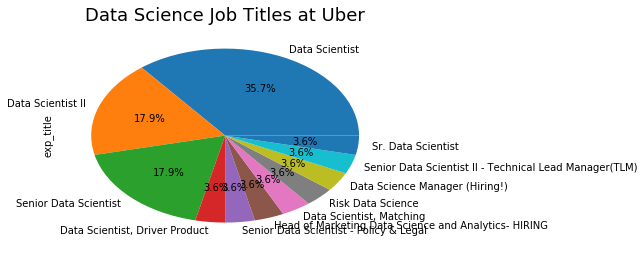

In [248]:
pie4 = expDS['exp_title'].value_counts().plot(kind="pie", autopct='%1.1f%%')

pie4.set_title("Data Science Job Titles at Uber", fontsize=18)

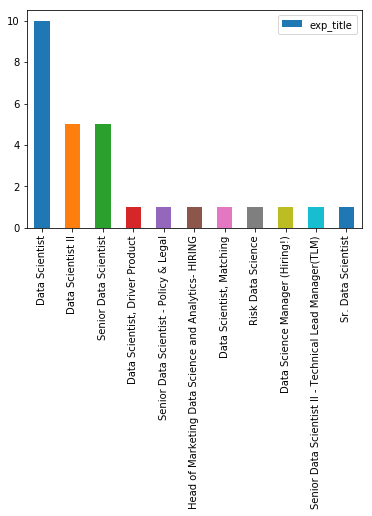

In [39]:
DSbar = expDS['exp_title'].value_counts().plot(kind="bar", legend = True)

## Data Scientist vs. Senior Data Scientist 

In [ ]:
Employees

### Degree Difference - Senior 

In [40]:
# separting into two categories - highest degree

#drop duplicates in dataframe and only keep: profile,exp_company,ed_degree,exp_title
less5 = Employees.iloc[:,[0,2,4,6]].drop_duplicates(keep = 'first')

#keep only information for uber
DShighdeg = less5.loc[less['exp_company'] == 'Uber']

In [41]:
#Pull last education year
DShighdeg = DShighdeg.groupby('profile').first()
DShighdeg = DShighdeg.reset_index()
DShighdeg

,profile,exp_company,exp_title,ed_deg
0,https://www.linkedin.com/in/9196377701/,Uber,Software Engineer II,"Master of Engineering (M.Eng.), Admissions Int..."
1,https://www.linkedin.com/in/akshaytiwari19/,Uber,Data Scientist,Master of Science - Data Science
2,https://www.linkedin.com/in/arunash/,Uber,Product Management,MBA
3,https://www.linkedin.com/in/ashrita-johnson-je...,Uber,Data Analyst Intern,Master’s Degree
4,https://www.linkedin.com/in/aysent/,Uber,Data Scientist II,Doctor of Philosophy (Ph.D.)
5,https://www.linkedin.com/in/e-ferhat-muhtar-36...,Uber,Head of Marketing Data Science and Analytics- ...,BA (top engineering school in Turkey)
6,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,Data Scientist,Doctor of Philosophy (Ph.D.)
7,https://www.linkedin.com/in/eric-pinkham/,Uber,Software Engineer II,Doctor of Philosophy (PhD)
8,https://www.linkedin.com/in/fabriziolecci/,Uber,Data Scientist,Doctor of Philosophy (Ph.D.)
9,https://www.linkedin.com/in/farman-sheikh-5735...,Uber,Lead Data Engineer,Bachelors


In [42]:
# what data science titles are in the value?
DShighdeg['exp_title'].unique()

array(['Software Engineer II', 'Data Scientist', 'Product Management',
       'Data Analyst Intern', 'Data Scientist II',
       'Head of Marketing Data Science and Analytics- HIRING',
       'Lead Data Engineer', 'Senior Data Scientist',
       'Data Analyst I, SEO & Web Analytics',
       'Data Science Manager - Applied Machine Learning',
       'Data and Insights, Risk management',
       'Senior Software Engineer - Data',
       'Data Science Manager (Hiring!)',
       'Senior Data Scientist II - Technical Lead Manager(TLM)',
       'Data Scientist, Matching', 'Product Consultant', 'Data Research',
       'Senior Data Scientist - Policy & Legal', 'Data Analyst II',
       'Software Engineer', 'Sr. Data Scientist',
       'Machine Learning Engineer', 'Data Analyst',
       'Data Scientist, Driver Product', 'Risk Data Science'],
      dtype=object)

In [43]:
# Function to categorize data science
def DS(x):
    if x.lower().find('senior') != -1 or x.lower().find('sr.') != -1:
        return(1)
    if x.lower().find('scientist') != -1:
         return(2)
    else:
        return(0)
   

#create column for category 
DShighdeg['DS'] = list(map(DS, DShighdeg['exp_title']))
DShighdeg

,profile,exp_company,exp_title,ed_deg,DS
0,https://www.linkedin.com/in/9196377701/,Uber,Software Engineer II,"Master of Engineering (M.Eng.), Admissions Int...",0
1,https://www.linkedin.com/in/akshaytiwari19/,Uber,Data Scientist,Master of Science - Data Science,2
2,https://www.linkedin.com/in/arunash/,Uber,Product Management,MBA,0
3,https://www.linkedin.com/in/ashrita-johnson-je...,Uber,Data Analyst Intern,Master’s Degree,0
4,https://www.linkedin.com/in/aysent/,Uber,Data Scientist II,Doctor of Philosophy (Ph.D.),2
5,https://www.linkedin.com/in/e-ferhat-muhtar-36...,Uber,Head of Marketing Data Science and Analytics- ...,BA (top engineering school in Turkey),0
6,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,Data Scientist,Doctor of Philosophy (Ph.D.),2
7,https://www.linkedin.com/in/eric-pinkham/,Uber,Software Engineer II,Doctor of Philosophy (PhD),0
8,https://www.linkedin.com/in/fabriziolecci/,Uber,Data Scientist,Doctor of Philosophy (Ph.D.),2
9,https://www.linkedin.com/in/farman-sheikh-5735...,Uber,Lead Data Engineer,Bachelors,0


In [44]:
#Remove value 0
DShighdeg = DShighdeg[DShighdeg.DS != 0]  

In [45]:
DShighdeg['DS'].value_counts(normalize=False)

2    17
1     9
Name: DS, dtype: int64

In [46]:
#create separate tables to compare highest level between each 

#Remove value 0
DShighdeg1 = DShighdeg[DShighdeg.DS != 2]
DShighdeg1

,profile,exp_company,exp_title,ed_deg,DS
10,https://www.linkedin.com/in/hesenpeng/,Uber,Senior Data Scientist,PhD,1
16,https://www.linkedin.com/in/lathendra/,Uber,Senior Software Engineer - Data,Bachelor's degree,1
18,https://www.linkedin.com/in/long-sun-a6b3a927/,Uber,Senior Data Scientist II - Technical Lead Mana...,Ph.D,1
19,https://www.linkedin.com/in/marjan-b-61437618/,Uber,Senior Data Scientist,Masters of Engineering (with Distinction),1
26,https://www.linkedin.com/in/robertahorton/,Uber,Senior Data Scientist - Policy & Legal,J.D.,1
30,https://www.linkedin.com/in/skanajan/,Uber,Senior Data Scientist,MS,1
31,https://www.linkedin.com/in/skashuk/,Uber,Senior Data Scientist,Doctor of Philosophy (PhD),1
35,https://www.linkedin.com/in/wenxiaogu/,Uber,Sr. Data Scientist,Master's degree,1
41,https://www.linkedin.com/in/yizhou-jerry-shen-...,Uber,Senior Data Scientist,Master's degree,1


In [47]:
# Function to categorize data science education 
def DS_deg(x):
    if x.lower().find('phd') != -1 or x.lower().find('ph.d') != -1:
         return(1)
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1:
         return(2)
    if x.lower().find('bachelor') != -1:
         return(3)    
    else:
        return(0)
   

#create column for category education 
DShighdeg1['DS_deg'] = list(map(DS_deg, DShighdeg1['ed_deg']))
DShighdeg1

/anaconda2/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,profile,exp_company,exp_title,ed_deg,DS,DS_deg
10,https://www.linkedin.com/in/hesenpeng/,Uber,Senior Data Scientist,PhD,1,1
16,https://www.linkedin.com/in/lathendra/,Uber,Senior Software Engineer - Data,Bachelor's degree,1,3
18,https://www.linkedin.com/in/long-sun-a6b3a927/,Uber,Senior Data Scientist II - Technical Lead Mana...,Ph.D,1,1
19,https://www.linkedin.com/in/marjan-b-61437618/,Uber,Senior Data Scientist,Masters of Engineering (with Distinction),1,2
26,https://www.linkedin.com/in/robertahorton/,Uber,Senior Data Scientist - Policy & Legal,J.D.,1,0
30,https://www.linkedin.com/in/skanajan/,Uber,Senior Data Scientist,MS,1,2
31,https://www.linkedin.com/in/skashuk/,Uber,Senior Data Scientist,Doctor of Philosophy (PhD),1,1
35,https://www.linkedin.com/in/wenxiaogu/,Uber,Sr. Data Scientist,Master's degree,1,2
41,https://www.linkedin.com/in/yizhou-jerry-shen-...,Uber,Senior Data Scientist,Master's degree,1,2


In [48]:
DShighdeg1['DS_deg'].value_counts(normalize=False)

2    4
1    3
3    1
0    1
Name: DS_deg, dtype: int64

([<matplotlib.axis.YTick at 0x1a22e886d0>,
 <a list of 10 Text yticklabel objects>)

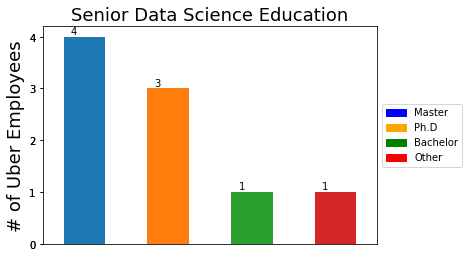

In [125]:
DSbar = DShighdeg1['DS_deg'].value_counts().plot(kind="bar", legend=True)
DSbar.set_title("Senior Data Science Education", fontsize=18)
DSbar.set_xlabel("Education", fontsize=18);
DSbar.set_ylabel("# of Uber Employees", fontsize=18);
labels5 = [item.get_text() for item in bar.get_xticklabels()]
labels5[0] = 'Master'
labels5[1] = 'Ph.D'
labels5[2] = 'Bachelor'
labels5[3] = 'Other'


ax5 = plt.axes()
x_axis5 = ax5.axes.get_xaxis()
x_axis5.set_visible(False)

Master = mpatches.Patch(color='blue', label='Master')
PhD = mpatches.Patch(color='orange', label='Ph.D')
Bachelor = mpatches.Patch(color='green', label='Bachelor')
Other = mpatches.Patch(color='red', label='Other')

plt.legend(handles=[Master,PhD,Bachelor,Other], loc='center left', bbox_to_anchor=(1, 0.5))

for c in ax5.patches:
    width, height = c.get_width(), c.get_height()
    x, y = c.get_xy() 
    DSbar.annotate(format(height), (c.get_x()+.18*width, c.get_y() + height + 0.05))
    
# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

### Degree difference - Entry

In [50]:
#create separate tables to compare highest level between each 

#Remove value 1
DShighdeg2 = DShighdeg[DShighdeg.DS != 1]
DShighdeg2

,profile,exp_company,exp_title,ed_deg,DS
1,https://www.linkedin.com/in/akshaytiwari19/,Uber,Data Scientist,Master of Science - Data Science,2
4,https://www.linkedin.com/in/aysent/,Uber,Data Scientist II,Doctor of Philosophy (Ph.D.),2
6,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,Data Scientist,Doctor of Philosophy (Ph.D.),2
8,https://www.linkedin.com/in/fabriziolecci/,Uber,Data Scientist,Doctor of Philosophy (Ph.D.),2
12,https://www.linkedin.com/in/hooshmand/,Uber,Data Scientist II,PhD,2
20,https://www.linkedin.com/in/melissadalis/,Uber,"Data Scientist, Matching",Bachelor of Science (B.S.),2
21,https://www.linkedin.com/in/mengjieding/,Uber,Data Scientist,Bachelor of Science,2
23,https://www.linkedin.com/in/olivia-yang-data-s...,Uber,Data Scientist,Master of Science (M.S.),2
25,https://www.linkedin.com/in/rahulrr/,Uber,Data Scientist,Master of Science (M.S.),2
27,https://www.linkedin.com/in/roy-yajia-yang-b1b...,Uber,Data Scientist,Master's degree,2


In [51]:
# Function to categorize data science education 
def DSE_deg(x):
    if x.lower().find('phd') != -1 or x.lower().find('ph.d') != -1:
         return(1)
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1:
         return(2)
    if x.lower().find('bachelor') != -1:
         return(3)    
    else:
        return(0)
   

#create column for category education 
DShighdeg2['DSE_deg'] = list(map(DSE_deg, DShighdeg2['ed_deg']))
DShighdeg2

/anaconda2/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,profile,exp_company,exp_title,ed_deg,DS,DSE_deg
1,https://www.linkedin.com/in/akshaytiwari19/,Uber,Data Scientist,Master of Science - Data Science,2,2
4,https://www.linkedin.com/in/aysent/,Uber,Data Scientist II,Doctor of Philosophy (Ph.D.),2,1
6,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,Data Scientist,Doctor of Philosophy (Ph.D.),2,1
8,https://www.linkedin.com/in/fabriziolecci/,Uber,Data Scientist,Doctor of Philosophy (Ph.D.),2,1
12,https://www.linkedin.com/in/hooshmand/,Uber,Data Scientist II,PhD,2,1
20,https://www.linkedin.com/in/melissadalis/,Uber,"Data Scientist, Matching",Bachelor of Science (B.S.),2,3
21,https://www.linkedin.com/in/mengjieding/,Uber,Data Scientist,Bachelor of Science,2,3
23,https://www.linkedin.com/in/olivia-yang-data-s...,Uber,Data Scientist,Master of Science (M.S.),2,2
25,https://www.linkedin.com/in/rahulrr/,Uber,Data Scientist,Master of Science (M.S.),2,2
27,https://www.linkedin.com/in/roy-yajia-yang-b1b...,Uber,Data Scientist,Master's degree,2,2


In [52]:
DShighdeg2['DSE_deg'].value_counts(normalize=False)

2    8
1    7
3    2
Name: DSE_deg, dtype: int64

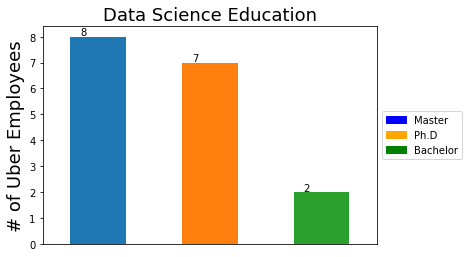

In [53]:
DSEbar = DShighdeg2['DSE_deg'].value_counts().plot(kind="bar", legend=True)
DSEbar.set_title("Data Science Education", fontsize=18)
DSEbar.set_xlabel("Education", fontsize=18);
DSEbar.set_ylabel("# of Uber Employees", fontsize=18);
labels6 = [item.get_text() for item in bar.get_xticklabels()]
labels5[0] = 'Master'
labels5[1] = 'Ph.D'
labels5[2] = 'Bachelor'

ax6 = plt.axes()
x_axis6 = ax6.axes.get_xaxis()
x_axis6.set_visible(False)

Master = mpatches.Patch(color='blue', label='Master')
PhD = mpatches.Patch(color='orange', label='Ph.D')
Bachelor = mpatches.Patch(color='green', label='Bachelor')

plt.legend(handles=[Master,PhD,Bachelor], loc='center left', bbox_to_anchor=(1, 0.5))

for e in ax6.patches:
    width, height = e.get_width(), e.get_height()
    x, y = e.get_xy() 
    DSEbar.annotate(format(height), (e.get_x()+.18*width, e.get_y() + height + 0.05))

### Experience difference - senior

In [54]:
# how many years of experience before Uber analysis for DS

#drop duplicates in dataframe and only keep: profile,exp_company,exp_dates,ed_dates,ed_degree,exp_title
less6 = Employees.iloc[:,[0, 2, 3, 4, 5, 6]].drop_duplicates(keep = 'first')

#keep only information for uber
DSexp = less6.loc[less['exp_company'] == 'Uber']

#drop nan values 
DSexp = DSexp.dropna(how='any')
DSexp

,profile,exp_company,exp_dates,exp_title,ed_dates,ed_deg
0,https://www.linkedin.com/in/tyzhangucb/,Uber,Jul 2017 – Present,Data Scientist II,2015 – 2016,Master of Arts (M.A.)
1,https://www.linkedin.com/in/tyzhangucb/,Uber,Jul 2017 – Present,Data Scientist II,2012 – 2015,Bachelor of Science (BS)
24,https://www.linkedin.com/in/skanajan/,Uber,Jul 2017 – Present,Senior Data Scientist,2003 – 2007,MS
25,https://www.linkedin.com/in/skanajan/,Uber,Jul 2017 – Present,Senior Data Scientist,2010 – 2016,Master of Business Administration (MBA)
26,https://www.linkedin.com/in/skanajan/,Uber,Jul 2017 – Present,Senior Data Scientist,2000 – 2002,MSEE
69,https://www.linkedin.com/in/fabriziolecci/,Uber,Jan 2017 – Present,Data Scientist,2011 – 2015,Doctor of Philosophy (Ph.D.)
70,https://www.linkedin.com/in/fabriziolecci/,Uber,Jan 2017 – Present,Data Scientist,2011 – 2012,Master of Science (MS)
71,https://www.linkedin.com/in/fabriziolecci/,Uber,Jan 2017 – Present,Data Scientist,2009 – 2011,Master's Degree
114,https://www.linkedin.com/in/shitaowang/,Uber,Oct 2017 – Present,Data Scientist II,2012 – 2017,Doctor of Philosophy (Ph.D.)
115,https://www.linkedin.com/in/shitaowang/,Uber,Oct 2017 – Present,Data Scientist II,2016 – 2016,Nanodegree


In [55]:
#only select last 4 string in value for the year 
DSexp.loc[:,'ed_dates'] = list(map(lambda x: None if x is None else str(x)[-4:], DSexp['ed_dates']))

#only select string inside whole value with the year
DSexp.loc[:,'exp_dates'] = list(map(lambda x: None if x is None else str(x)[4:9], DSexp['exp_dates']))

#Pull last education year
DSexp = DSexp.groupby('profile').first()
DSexp = DSexp.reset_index()
DSexp

,profile,exp_company,exp_dates,exp_title,ed_dates,ed_deg
0,https://www.linkedin.com/in/9196377701/,Uber,2017,Software Engineer II,2017,"Master of Engineering (M.Eng.), Admissions Int..."
1,https://www.linkedin.com/in/akshaytiwari19/,Uber,2018,Data Scientist,2018,Master of Science - Data Science
2,https://www.linkedin.com/in/arunash/,Uber,2019,Product Management,2013,MBA
3,https://www.linkedin.com/in/ashrita-johnson-je...,Uber,2017,Data Analyst Intern,2018,Master’s Degree
4,https://www.linkedin.com/in/aysent/,Uber,2018,Data Scientist II,2016,Doctor of Philosophy (Ph.D.)
5,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,2018,Data Scientist,2015,Doctor of Philosophy (Ph.D.)
6,https://www.linkedin.com/in/eric-pinkham/,Uber,2018,Software Engineer II,2017,Doctor of Philosophy (PhD)
7,https://www.linkedin.com/in/fabriziolecci/,Uber,2017,Data Scientist,2015,Doctor of Philosophy (Ph.D.)
8,https://www.linkedin.com/in/hesenpeng/,Uber,2017,Senior Data Scientist,2012,PhD
9,https://www.linkedin.com/in/hongyanglei/,Uber,2018,"Data Analyst I, SEO & Web Analytics",2016,Master of Science


In [56]:
#drop row with value '-' in column exp_dates 
DSexp = DSexp.drop([14])

#change dtype from object to int.
DSexp['ed_dates'] = degexpE['ed_dates'].astype(str).astype(int)
DSexp['exp_dates'] = degexpE['exp_dates'].astype(str).astype(int)

# Create years_exp column with totals
DSexp['years_exp'] = DSexp['exp_dates'] - DSexp['ed_dates']
DSexp

,profile,exp_company,exp_dates,exp_title,ed_dates,ed_deg,years_exp
0,https://www.linkedin.com/in/9196377701/,Uber,2017,Software Engineer II,2017,"Master of Engineering (M.Eng.), Admissions Int...",0
1,https://www.linkedin.com/in/akshaytiwari19/,Uber,2018,Data Scientist,2018,Master of Science - Data Science,0
2,https://www.linkedin.com/in/arunash/,Uber,2019,Product Management,2013,MBA,6
3,https://www.linkedin.com/in/ashrita-johnson-je...,Uber,2017,Data Analyst Intern,2018,Master’s Degree,-1
4,https://www.linkedin.com/in/aysent/,Uber,2018,Data Scientist II,2016,Doctor of Philosophy (Ph.D.),2
5,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,2018,Data Scientist,2015,Doctor of Philosophy (Ph.D.),3
6,https://www.linkedin.com/in/eric-pinkham/,Uber,2018,Software Engineer II,2017,Doctor of Philosophy (PhD),1
7,https://www.linkedin.com/in/fabriziolecci/,Uber,2017,Data Scientist,2015,Doctor of Philosophy (Ph.D.),2
8,https://www.linkedin.com/in/hesenpeng/,Uber,2017,Senior Data Scientist,2012,PhD,5
9,https://www.linkedin.com/in/hongyanglei/,Uber,2018,"Data Analyst I, SEO & Web Analytics",2016,Master of Science,2


In [57]:
# Function to categorize data science
def DS_exp(x):
    if x.lower().find('senior') != -1 or x.lower().find('sr.') != -1:
        return(1)
    if x.lower().find('scientist') != -1:
         return(2)
    else:
        return(0)
   

#create column for category 
DSexp['DS_exp'] = list(map(DS_exp, DSexp['exp_title']))
DSexp

,profile,exp_company,exp_dates,exp_title,ed_dates,ed_deg,years_exp,DS_exp
0,https://www.linkedin.com/in/9196377701/,Uber,2017,Software Engineer II,2017,"Master of Engineering (M.Eng.), Admissions Int...",0,0
1,https://www.linkedin.com/in/akshaytiwari19/,Uber,2018,Data Scientist,2018,Master of Science - Data Science,0,2
2,https://www.linkedin.com/in/arunash/,Uber,2019,Product Management,2013,MBA,6,0
3,https://www.linkedin.com/in/ashrita-johnson-je...,Uber,2017,Data Analyst Intern,2018,Master’s Degree,-1,0
4,https://www.linkedin.com/in/aysent/,Uber,2018,Data Scientist II,2016,Doctor of Philosophy (Ph.D.),2,2
5,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,2018,Data Scientist,2015,Doctor of Philosophy (Ph.D.),3,2
6,https://www.linkedin.com/in/eric-pinkham/,Uber,2018,Software Engineer II,2017,Doctor of Philosophy (PhD),1,0
7,https://www.linkedin.com/in/fabriziolecci/,Uber,2017,Data Scientist,2015,Doctor of Philosophy (Ph.D.),2,2
8,https://www.linkedin.com/in/hesenpeng/,Uber,2017,Senior Data Scientist,2012,PhD,5,1
9,https://www.linkedin.com/in/hongyanglei/,Uber,2018,"Data Analyst I, SEO & Web Analytics",2016,Master of Science,2,0


In [58]:
#Remove value 0
DSexp = DSexp[DSexp.DS_exp != 0] 

In [98]:
DSexp['DS_exp'].value_counts(normalize=False)  ##numbers are different due to droping nan values with no date years


2    13
1     6
Name: DS_exp, dtype: int64

In [60]:
#create separate tables to compare experience level between each 

#Remove value 2
DSexp1 = DSexp[DSexp.DS_exp != 2]
DSexp1

,profile,exp_company,exp_dates,exp_title,ed_dates,ed_deg,years_exp,DS_exp
8,https://www.linkedin.com/in/hesenpeng/,Uber,2017,Senior Data Scientist,2012,PhD,5,1
13,https://www.linkedin.com/in/lathendra/,Uber,2017,Senior Software Engineer - Data,2006,Bachelor's degree,11,1
18,https://www.linkedin.com/in/robertahorton/,Uber,2015,Senior Data Scientist - Policy & Legal,2009,J.D.,6,1
22,https://www.linkedin.com/in/skanajan/,Uber,2017,Senior Data Scientist,2007,MS,10,1
23,https://www.linkedin.com/in/skashuk/,Uber,2017,Senior Data Scientist,2014,Doctor of Philosophy (PhD),3,1
26,https://www.linkedin.com/in/wenxiaogu/,Uber,2017,Sr. Data Scientist,2014,Master's degree,3,1


([<matplotlib.axis.YTick at 0x1a23013650>,
 <a list of 10 Text yticklabel objects>)

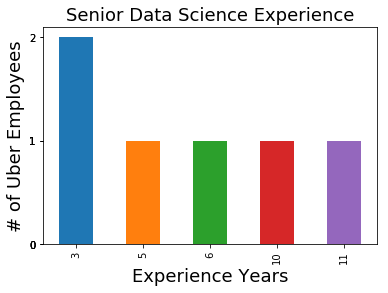

In [127]:
DSexpbar = DSexp1['years_exp'].value_counts().sort_index(ascending=True).plot(kind="bar", legend=False)
DSexpbar.set_title("Senior Data Science Experience", fontsize=18)
DSexpbar.set_xlabel("Experience Years", fontsize=18);
DSexpbar.set_ylabel("# of Uber Employees", fontsize=18);

# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

In [62]:
#create separate tables to compare experience level between each 

#Remove value 2
DSexp2 = DSexp[DSexp.DS_exp != 1]
DSexp2

,profile,exp_company,exp_dates,exp_title,ed_dates,ed_deg,years_exp,DS_exp
1,https://www.linkedin.com/in/akshaytiwari19/,Uber,2018,Data Scientist,2018,Master of Science - Data Science,0,2
4,https://www.linkedin.com/in/aysent/,Uber,2018,Data Scientist II,2016,Doctor of Philosophy (Ph.D.),2,2
5,https://www.linkedin.com/in/eric-janofsky-9500...,Uber,2018,Data Scientist,2015,Doctor of Philosophy (Ph.D.),3,2
7,https://www.linkedin.com/in/fabriziolecci/,Uber,2017,Data Scientist,2015,Doctor of Philosophy (Ph.D.),2,2
10,https://www.linkedin.com/in/hooshmand/,Uber,2018,Data Scientist II,2015,PhD,3,2
15,https://www.linkedin.com/in/mengjieding/,Uber,2017,Data Scientist,2012,Bachelor of Science,5,2
17,https://www.linkedin.com/in/rahulrr/,Uber,2018,Data Scientist,2015,Master of Science (M.S.),3,2
19,https://www.linkedin.com/in/roy-yajia-yang-b1b...,Uber,2017,Data Scientist,2015,Master's degree,2,2
21,https://www.linkedin.com/in/shitaowang/,Uber,2017,Data Scientist II,2017,Doctor of Philosophy (Ph.D.),0,2
25,https://www.linkedin.com/in/tyzhangucb/,Uber,2017,Data Scientist II,2016,Master of Arts (M.A.),1,2


([<matplotlib.axis.YTick at 0x1a22fbfed0>,
 <a list of 10 Text yticklabel objects>)

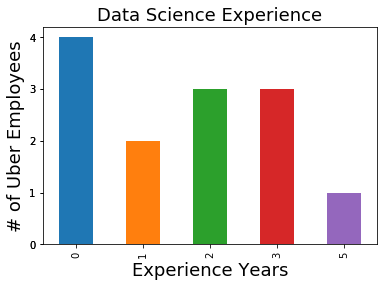

In [128]:
DSexpbar2 = DSexp2['years_exp'].value_counts().sort_index(ascending=True).plot(kind="bar", legend=False)
DSexpbar2.set_title("Data Science Experience", fontsize=18)
DSexpbar2.set_xlabel("Experience Years", fontsize=18);
DSexpbar2.set_ylabel("# of Uber Employees", fontsize=18);

# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

### Skills Difference - Senior

In [80]:
Employees

,profile,skill,exp_company,exp_dates,exp_title,ed_dates,ed_deg,ed_name
0,https://www.linkedin.com/in/tyzhangucb/,R,Uber,Jul 2017 – Present,Data Scientist II,2015 – 2016,Master of Arts (M.A.),4.00/4.00
1,https://www.linkedin.com/in/tyzhangucb/,R,Uber,Jul 2017 – Present,Data Scientist II,2012 – 2015,Bachelor of Science (BS),3.993/4.00
2,https://www.linkedin.com/in/tyzhangucb/,R,LeanTaaS,Jun 2016 – Jul 2017,Data Scientist,2015 – 2016,Master of Arts (M.A.),4.00/4.00
3,https://www.linkedin.com/in/tyzhangucb/,R,LeanTaaS,Jun 2016 – Jul 2017,Data Scientist,2012 – 2015,Bachelor of Science (BS),3.993/4.00
4,https://www.linkedin.com/in/tyzhangucb/,R,Tencent,Jun 2015 – Aug 2015,Strategy Intern,2015 – 2016,Master of Arts (M.A.),4.00/4.00
5,https://www.linkedin.com/in/tyzhangucb/,R,Tencent,Jun 2015 – Aug 2015,Strategy Intern,2012 – 2015,Bachelor of Science (BS),3.993/4.00
6,https://www.linkedin.com/in/tyzhangucb/,R,Alibaba Group,May 2014 – Jul 2014,Data Science Intern,2015 – 2016,Master of Arts (M.A.),4.00/4.00
7,https://www.linkedin.com/in/tyzhangucb/,R,Alibaba Group,May 2014 – Jul 2014,Data Science Intern,2012 – 2015,Bachelor of Science (BS),3.993/4.00
8,https://www.linkedin.com/in/tyzhangucb/,Python,Uber,Jul 2017 – Present,Data Scientist II,2015 – 2016,Master of Arts (M.A.),4.00/4.00
9,https://www.linkedin.com/in/tyzhangucb/,Python,Uber,Jul 2017 – Present,Data Scientist II,2012 – 2015,Bachelor of Science (BS),3.993/4.00


In [89]:
# mentions of skills for data science comparison 

#drop duplicates in dataframe and only keep: profile,exp_title,skill,exp_company
less11 = Employees.iloc[:,[0, 1, 2, 4]].drop_duplicates(keep = 'first')

#keep only information for uber
skil_ds = less11.loc[less11['exp_company'] == 'Uber', ]

#drop nan values 
#DSexp = DSexp.dropna(how='any')
#DSexp

#Gathering only the employee's last job title which is at Uber
#skil_ds = less11.groupby('profile').first()

In [90]:
skil_ds

,profile,skill,exp_company,exp_title
0,https://www.linkedin.com/in/tyzhangucb/,R,Uber,Data Scientist II
8,https://www.linkedin.com/in/tyzhangucb/,Python,Uber,Data Scientist II
16,https://www.linkedin.com/in/tyzhangucb/,SQL,Uber,Data Scientist II
24,https://www.linkedin.com/in/skanajan/,Machine Learning,Uber,Senior Data Scientist
39,https://www.linkedin.com/in/skanajan/,Python,Uber,Senior Data Scientist
54,https://www.linkedin.com/in/skanajan/,Software Development,Uber,Senior Data Scientist
69,https://www.linkedin.com/in/fabriziolecci/,Statistical Modeling,Uber,Data Scientist
84,https://www.linkedin.com/in/fabriziolecci/,Machine Learning,Uber,Data Scientist
99,https://www.linkedin.com/in/fabriziolecci/,Data Science,Uber,Data Scientist
114,https://www.linkedin.com/in/shitaowang/,Python,Uber,Data Scientist II


In [92]:
# Function to categorize data science
def DSs(x):
    if x.lower().find('senior') != -1 or x.lower().find('sr.') != -1:
        return(1)
    if x.lower().find('scientist') != -1:
         return(2)
    else:
        return(0)
   

#create column for category 
skil_ds['DS'] = list(map(DSs, skil_ds['exp_title']))
skil_ds

/anaconda2/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,profile,skill,exp_company,exp_title,DS
0,https://www.linkedin.com/in/tyzhangucb/,R,Uber,Data Scientist II,2
8,https://www.linkedin.com/in/tyzhangucb/,Python,Uber,Data Scientist II,2
16,https://www.linkedin.com/in/tyzhangucb/,SQL,Uber,Data Scientist II,2
24,https://www.linkedin.com/in/skanajan/,Machine Learning,Uber,Senior Data Scientist,1
39,https://www.linkedin.com/in/skanajan/,Python,Uber,Senior Data Scientist,1
54,https://www.linkedin.com/in/skanajan/,Software Development,Uber,Senior Data Scientist,1
69,https://www.linkedin.com/in/fabriziolecci/,Statistical Modeling,Uber,Data Scientist,2
84,https://www.linkedin.com/in/fabriziolecci/,Machine Learning,Uber,Data Scientist,2
99,https://www.linkedin.com/in/fabriziolecci/,Data Science,Uber,Data Scientist,2
114,https://www.linkedin.com/in/shitaowang/,Python,Uber,Data Scientist II,2


In [93]:
#Remove value 0
skil_ds = skil_ds[skil_ds.DS != 0] 

In [95]:
#create separate tables to compare skills between each 

#Remove value 2
skil_ds1 = skil_ds[skil_ds.DS != 2]
skil_ds1

,profile,skill,exp_company,exp_title,DS
24,https://www.linkedin.com/in/skanajan/,Machine Learning,Uber,Senior Data Scientist,1
39,https://www.linkedin.com/in/skanajan/,Python,Uber,Senior Data Scientist,1
54,https://www.linkedin.com/in/skanajan/,Software Development,Uber,Senior Data Scientist,1
141,https://www.linkedin.com/in/skashuk/,Python,Uber,Senior Data Scientist,1
151,https://www.linkedin.com/in/skashuk/,Mathematical Modeling,Uber,Senior Data Scientist,1
161,https://www.linkedin.com/in/skashuk/,Optimization Models,Uber,Senior Data Scientist,1
498,https://www.linkedin.com/in/yizhou-jerry-shen-...,Microsoft Excel,Uber,Senior Data Scientist,1
513,https://www.linkedin.com/in/yizhou-jerry-shen-...,Strategy,Uber,Senior Data Scientist,1
528,https://www.linkedin.com/in/yizhou-jerry-shen-...,Data Analysis,Uber,Senior Data Scientist,1
588,https://www.linkedin.com/in/wenxiaogu/,Machine Learning,Uber,Sr. Data Scientist,1


In [100]:
skil_ds1['skill'].value_counts(normalize=False) 

Machine Learning              5
Python                        4
Algorithms                    2
Data Analysis                 2
Optimization Models           1
Experimental Design           1
Big Data                      1
Combinatorial Optimization    1
Microsoft Excel               1
Hadoop                        1
Databases                     1
Hive                          1
Strategy                      1
R                             1
Statistical Modeling          1
Data Mining                   1
Mathematical Modeling         1
Software Development          1
Name: skill, dtype: int64

In [ ]:
#drop duplicates in dataframe and only keep: profile,skill
#DSskill1 = DSskill1.iloc[:,[0, 1]].drop_duplicates(keep = 'first')
#DSskill1

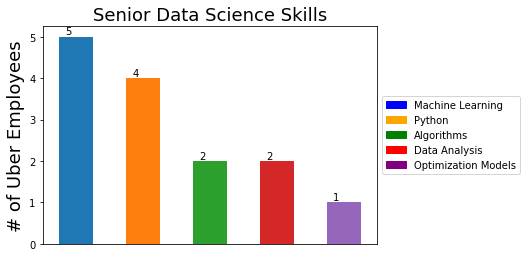

In [133]:
skil_dsbar = skil_ds1['skill'].value_counts().nlargest(5).plot(kind="bar", legend=False)
skil_dsbar.set_title("Senior Data Science Skills", fontsize=18)
skil_dsbar.set_xlabel("Skills", fontsize=18);
skil_dsbar.set_ylabel("# of Uber Employees", fontsize=18);

labels11 = [item.get_text() for item in bar.get_xticklabels()]
labels11[0] = 'Machine Learning'
labels11[1] = 'Python'
labels11[2] = 'Algorithms'
labels11[3] = 'Data Analysis'
labels11[4] = 'Optimization Models'

axx = plt.axes()
x_axis2 = axx.axes.get_xaxis()
x_axis2.set_visible(False)

MachineLearning = mpatches.Patch(color='blue', label='Machine Learning')
Python = mpatches.Patch(color='orange', label='Python')
Algorithms = mpatches.Patch(color='green', label='Algorithms')
DataAnalysis = mpatches.Patch(color='red', label='Data Analysis')
OptimizationModels = mpatches.Patch(color='purple', label='Optimization Models')

plt.legend(handles=[MachineLearning,Python,Algorithms,DataAnalysis,OptimizationModels], loc='center left', bbox_to_anchor=(1, 0.5))

for z in axx.patches:
    width, height = z.get_width(), z.get_height()
    x, y = z.get_xy() 
    skil_dsbar.annotate(format(height), (z.get_x()+.18*width, z.get_y() + height + 0.05))
    

### Skills Difference - Entry

In [101]:
#create separate tables to compare skills between each 

#Remove value 1
skil_ds2 = skil_ds[skil_ds.DS != 1]
skil_ds2

,profile,skill,exp_company,exp_title,DS
0,https://www.linkedin.com/in/tyzhangucb/,R,Uber,Data Scientist II,2
8,https://www.linkedin.com/in/tyzhangucb/,Python,Uber,Data Scientist II,2
16,https://www.linkedin.com/in/tyzhangucb/,SQL,Uber,Data Scientist II,2
69,https://www.linkedin.com/in/fabriziolecci/,Statistical Modeling,Uber,Data Scientist,2
84,https://www.linkedin.com/in/fabriziolecci/,Machine Learning,Uber,Data Scientist,2
99,https://www.linkedin.com/in/fabriziolecci/,Data Science,Uber,Data Scientist,2
114,https://www.linkedin.com/in/shitaowang/,Python,Uber,Data Scientist II,2
123,https://www.linkedin.com/in/shitaowang/,Data Analysis,Uber,Data Scientist II,2
132,https://www.linkedin.com/in/shitaowang/,C++,Uber,Data Scientist II,2
171,https://www.linkedin.com/in/yichenco2/,Python,Uber,"Data Scientist, Driver Product",2


In [102]:
skil_ds2['skill'].value_counts(normalize=False) 

Python                       6
Machine Learning             6
R                            3
Data Analysis                3
Matlab                       3
Data Mining                  2
Statistics                   2
Data Science                 2
C++                          2
Algorithms                   2
Statistical Modeling         2
Exploratory Data Analysis    1
Quantitative Finance         1
Programming                  1
C                            1
SQL                          1
Deep Learning                1
Time Series Analysis         1
Quantitative Analytics       1
Computer Science             1
Asset Allocation             1
Global Macro                 1
Design of Experiments        1
Name: skill, dtype: int64

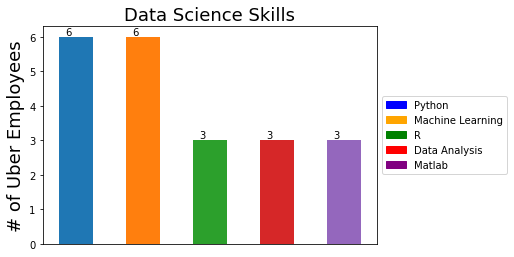

In [134]:
skil_dsbar2 = skil_ds2['skill'].value_counts().nlargest(5).plot(kind="bar", legend=False)
skil_dsbar2.set_title("Data Science Skills", fontsize=18)
skil_dsbar2.set_xlabel("Skills", fontsize=18);
skil_dsbar2.set_ylabel("# of Uber Employees", fontsize=18);

labelsc = [item.get_text() for item in bar.get_xticklabels()]
labelsc[0] = 'Python'
labelsc[1] = 'Machine Learning'
labelsc[2] = 'R'
labelsc[3] = 'Data Analysis'
labelsc[4] = 'Matlab'

axx = plt.axes()
x_axis2 = axx.axes.get_xaxis()
x_axis2.set_visible(False)

Python = mpatches.Patch(color='blue', label='Python')
MachineLearning = mpatches.Patch(color='orange', label='Machine Learning')
R = mpatches.Patch(color='green', label='R')
DataAnalysis = mpatches.Patch(color='red', label='Data Analysis')
Matlab = mpatches.Patch(color='purple', label='Matlab')

plt.legend(handles=[Python,MachineLearning,R,DataAnalysis,Matlab], loc='center left', bbox_to_anchor=(1, 0.5))

for z in axx.patches:
    width, height = z.get_width(), z.get_height()
    x, y = z.get_xy() 
    skil_dsbar2.annotate(format(height), (z.get_x()+.18*width, z.get_y() + height + 0.05))
    